In [1]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.layers import LSTM
from keras.models import load_model

import h5py
import requests



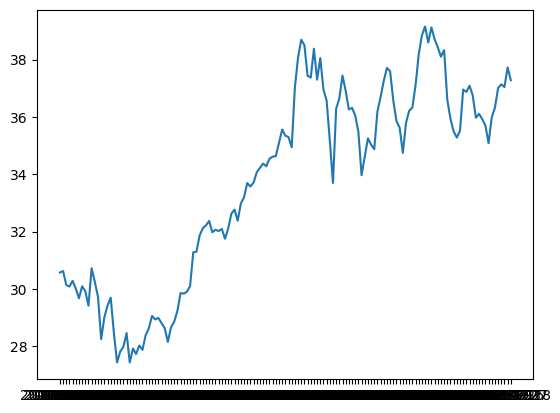

array([[0.26773949],
       [0.27225052],
       [0.23067532],
       [0.22592045],
       [0.24298952],
       [0.22019018],
       [0.19105092],
       [0.22677392],
       [0.21189948],
       [0.16922697]])

In [4]:
data_df =pd.read_csv("C:/Users/stud/Downloads/prices-split-adjusted.csv", index_col = 0)
df2 = pd.read_excel("C:/Users/stud/Downloads/fundamentals.xlsx")
data_df = data_df[data_df.symbol == 'AAPL']
data_df.drop(['symbol'],axis=1,inplace=True)
data_df.head()
data_df.shape
plt.plot(data_df['close'])
plt.show()
data_df['date'] = data_df.index
data_df['date'] = pd.to_datetime(data_df['date'])
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['close'].values.reshape(-1, 1))
dataset[0:10]


In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train,test=dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
print(len(data_df))
print(1233 + 529)


100 43
143
1762


In [6]:
#set the look back date as 15 days, which is the number of previous time steps to use as input variables #to predict the next time period
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [7]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(84, 15)
(84,)
(27, 15)
(27,)
(84, 1, 15)
(84,)
(27, 1, 15)
(27,)


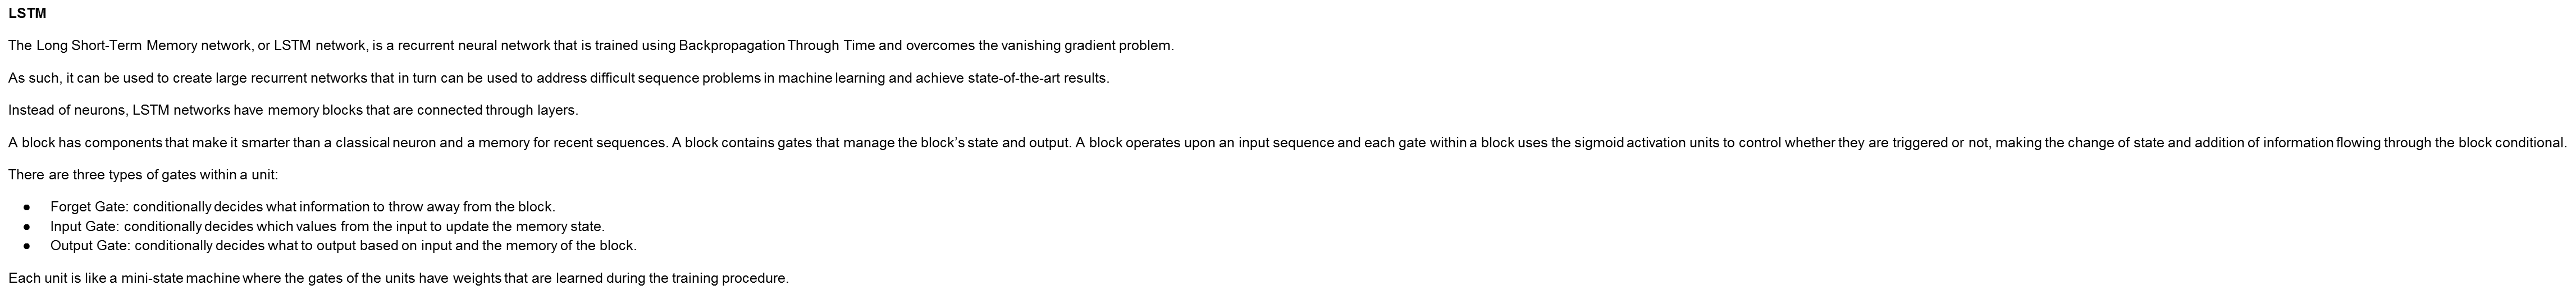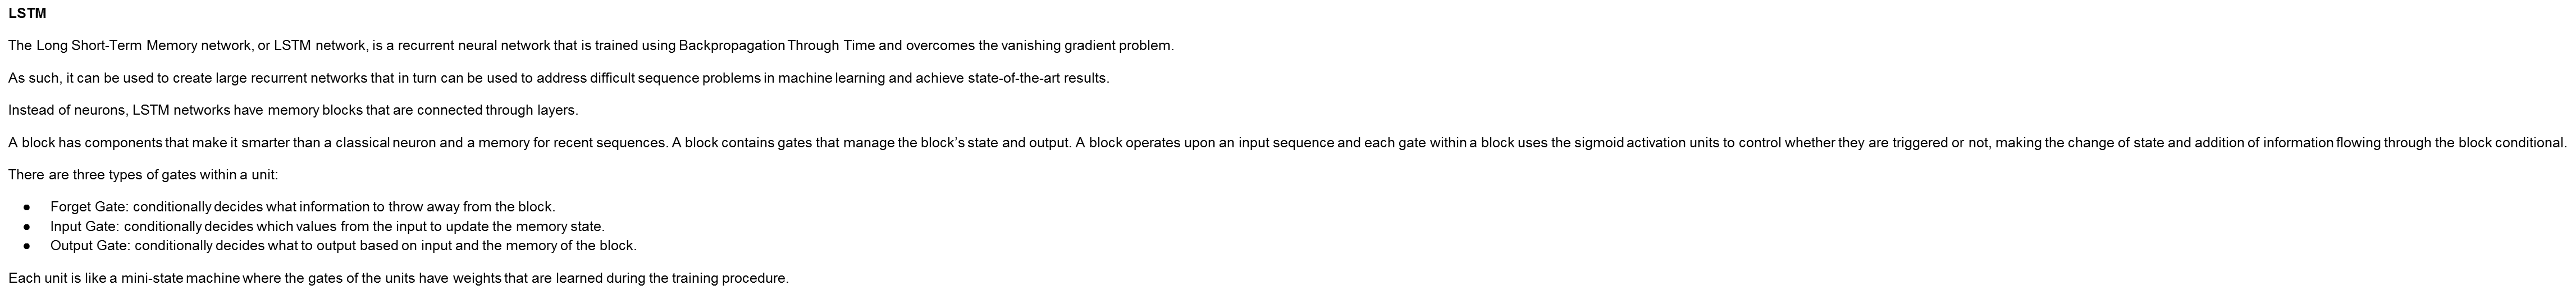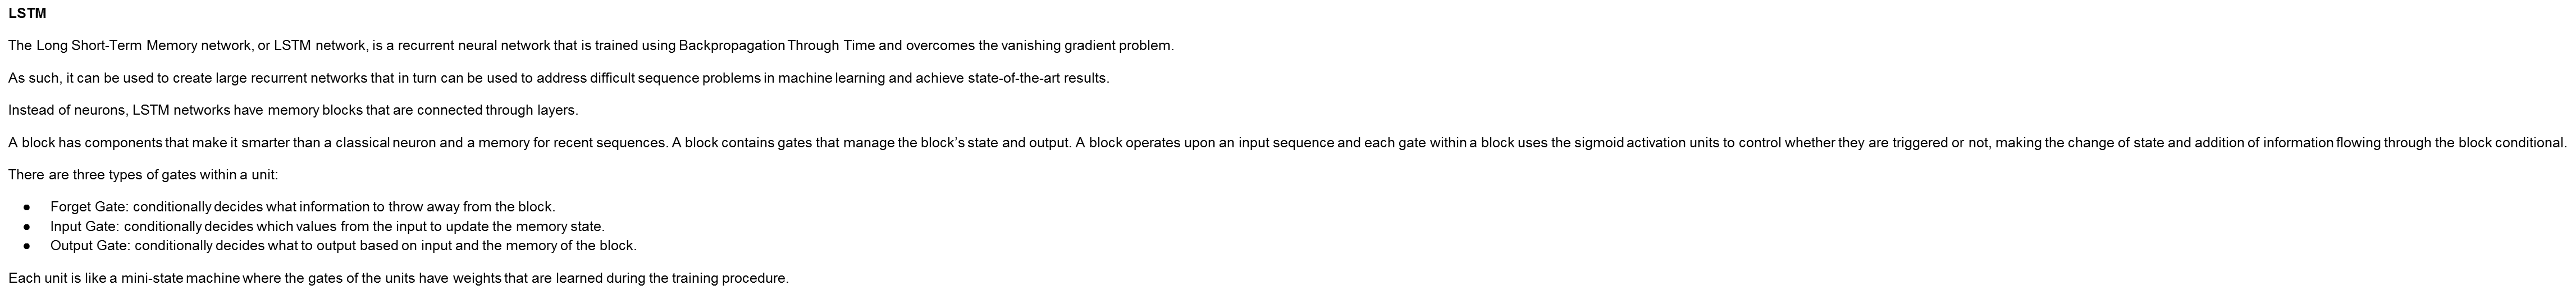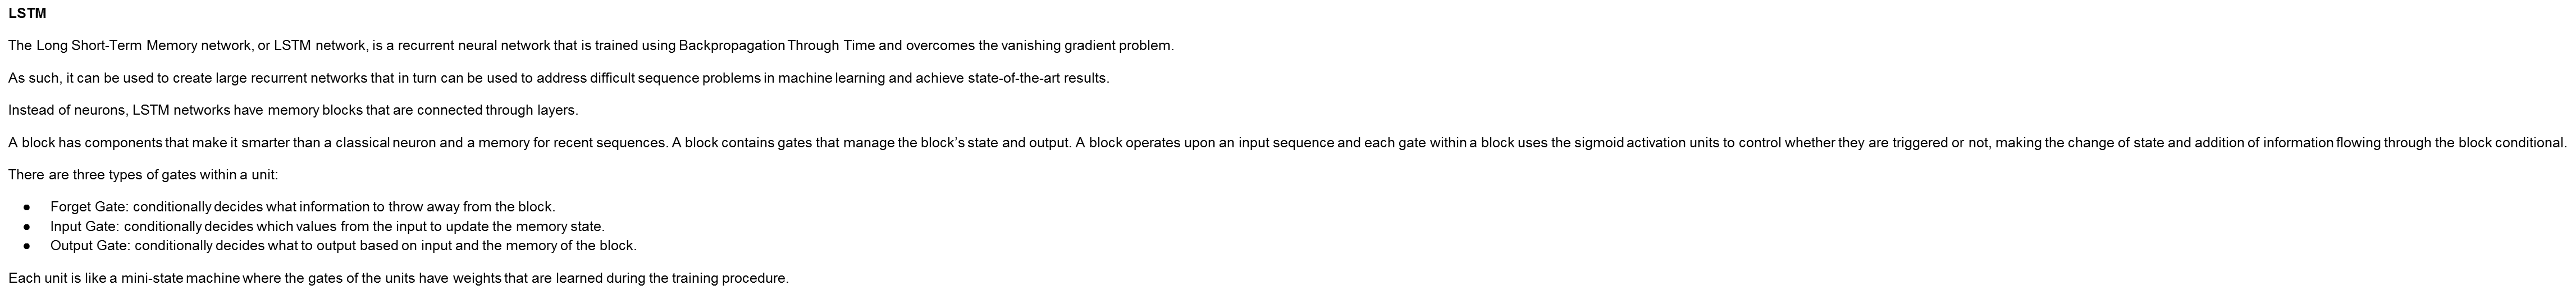LSTM
The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.
As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.
Instead of neurons, LSTM networks have memory blocks that are connected through layers.
A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.
There are three types of gates within a unit:
Forget Gate: conditionally decides what information to throw away from the block.
Input Gate: conditionally decides which values from the input to update the memory state.
Output Gate: conditionally decides what to output based on input and the memory of the block.
Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training pr
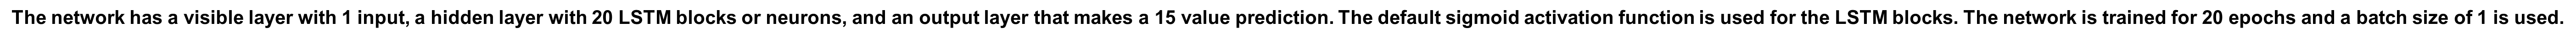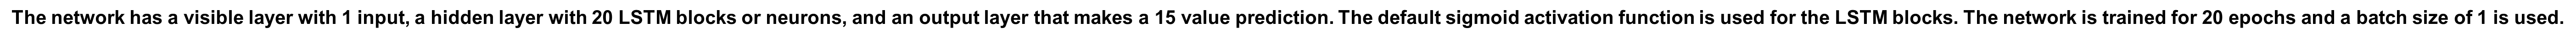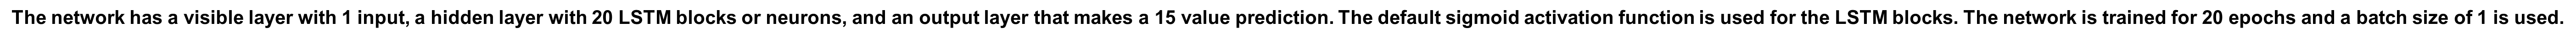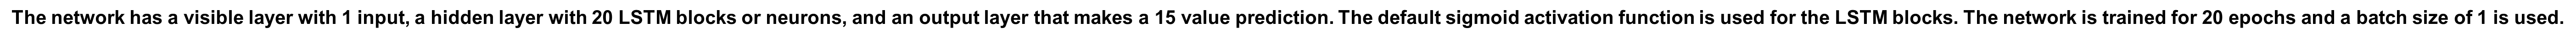The network has a visible layer with 1 input, a hidden layer with 20 LSTM blocks or neurons, and an output layer that makes a 15 value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 20 epochs and a batch size of 1 is used.
ocedure.


In [8]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)




Epoch 1/20

84/84 - 2s - loss: 0.1511 - 2s/epoch - 23ms/step
Epoch 2/20
84/84 - 0s - loss: 0.0156 - 103ms/epoch - 1ms/step
Epoch 3/20
84/84 - 0s - loss: 0.0144 - 116ms/epoch - 1ms/step
Epoch 4/20
84/84 - 0s - loss: 0.0140 - 117ms/epoch - 1ms/step
Epoch 5/20
84/84 - 0s - loss: 0.0124 - 106ms/epoch - 1ms/step
Epoch 6/20
84/84 - 0s - loss: 0.0120 - 112ms/epoch - 1ms/step
Epoch 7/20
84/84 - 0s - loss: 0.0108 - 116ms/epoch - 1ms/step
Epoch 8/20
84/84 - 0s - loss: 0.0099 - 118ms/epoch - 1ms/step
Epoch 9/20
84/84 - 0s - loss: 0.0092 - 116ms/epoch - 1ms/step
Epoch 10/20
84/84 - 0s - loss: 0.0091 - 117ms/epoch - 1ms/step
Epoch 11/20
84/84 - 0s - loss: 0.0082 - 101ms/epoch - 1ms/step
Epoch 12/20
84/84 - 0s - loss: 0.0081 - 118ms/epoch - 1ms/step
Epoch 13/20
84/84 - 0s - loss: 0.0071 - 116ms/epoch - 1ms/step
Epoch 14/20
84/84 - 0s - loss: 0.0080 - 117ms/epoch - 1ms/step
Epoch 15/20
84/84 - 0s - loss: 0.0065 - 118ms/epoch - 1ms/step
Epoch 16/20
84/84 - 0s - loss: 0.0067 - 99ms/epoch - 1ms/step
E

In [9]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


1/1 [==============================] - 0s 18ms/step
Train Score: 0.89 RMSE
Test Score: 1.17 RMSE


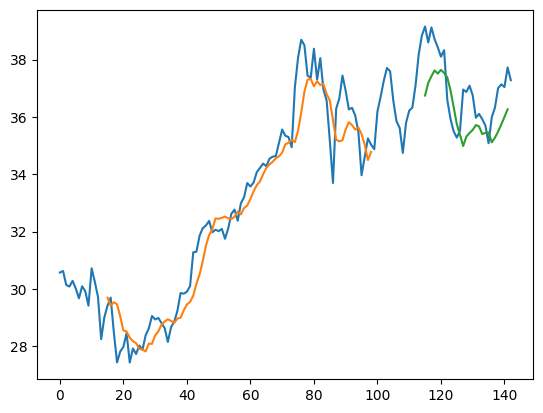

In [10]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
